<a href="https://colab.research.google.com/github/crmnrvr/Tesis/blob/main/Carmen_resample_cos_match_s99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Specific Objectives.

1) Obtain the redshift of a named target and use it to correct its COS spectra.

2) Resample the COS spectrum of a named target to match the number of points in the S99 wavelength arrays. 

3) Verify that objective 2) was done correctly.

# Resources.

### Definitions.

<b>Young Star Cluster (YSC)</b>. A star cluster of total mass in stars >= 1E4 Msun that contains O and B stars.

<b>Rectified Spectrum</b>. A rectified spectrum is one where the luminosity array 
 has been divided at each wavelength by the value of the continuum at that wavelength.
 For this definition, the continuum is the part of the spectrum that is free of spectral lines.

[Diffraction grating](https://www.khanacademy.org/science/physics/light-waves/interference-of-light-waves/v/diffraction-grating) 

[COS gratings](https://hst-docs.stsci.edu/cosihb/chapter-13-spectroscopic-reference-material/13-3-gratings)

### Python.

[spectres](https://spectres.readthedocs.io/en/latest/)

# Activity.

### Instructions.

This activity uses NGC 1512 as an example. Repeat steps for NGC 1566.

### Create S99 wavelength array to be used.

In [ ]:
# Load relevant package
import numpy as np

#------------------------------------------------------------
# Path to s99 model.
#path = '/Users/aidawofford/My/Investigacion/HST/c26-2018/15627_Adamo_CLUES/Models/v94_z020_10Myr/'
path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

# Model filename.
model='v94_z020_10Myr.ifaspec1'

#------------------------------------------------------------
# First age available
t0 = .10000E+05

#------------------------------------------------------------
# Load model
data=np.loadtxt(path+model, skiprows=6, delimiter="       ")
t, x, logy, yrec = np.transpose(data)

#------------------------------------------------------------
# Select portion of wavelength array corresponding to t0 and the range between 1150 and 1700 Angstroms.

x99=x[np.nonzero((t == t0) & (x >= 1150.) & (x <= 1700.))]

### Use astroquery to obtain redshift of target.

In [ ]:
!pip install astroquery
# Example, NGC 1512
from astroquery.ned import Ned
result_table = Ned.query_object("NGC 1512")
z = result_table['Redshift'][0]
print('z=', z)

     |████████████████████████████████| 4.4 MB 31.2 MB/s 
     |████████████████████████████████| 802 kB 48.8 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 3.0 MB 59.4 MB/s 
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=080358b3701a62c374467339050b96f3a398501191992a5fb95ef138186f2a99
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1833bd694024801f7aacddcda8a687e8d5fbaeebd
Successfully built mimeparse
z= 0.002995


### Load rectified COS spectra of YSCs 1 and 2, from all gratings, into wavelength and luminosity variables. Correct wavelength arrays for redshift.

In [ ]:
# Load relevant package
import numpy as np

# Path to rectified spectrum of YSC # 1
#path='../Data/Spectra/NGC-1512-YSC1/'
path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

# There are spectra obtained with gratings G130M and G160M for this YSC
grating=['NGC-1512-YSC1_G130M_normspec_wLya.dat','NGC-1512-YSC1_G160M_normspec_wLya.dat']
x130_1 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_1 = np.genfromtxt(path+grating[0], usecols=4)
x160_1 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_1 = np.genfromtxt(path+grating[1], usecols=4)

# Path to rectified spectrum of YSC # 2
#path='../Data/Spectra/NGC-1512-YSC2/'
path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

# There are spectra obtained with gratings G130M and G160M for this YSC
grating=['NGC-1512-YSC2_G130M_normspec_wLya.dat','NGC-1512-YSC2_G160M_normspec_wLya.dat']
x130_2 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_2 = np.genfromtxt(path+grating[0], usecols=4)
x160_2 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_2 = np.genfromtxt(path+grating[1], usecols=4)

### Resample the observed spectra.

In [ ]:
# Load the re-sampling module.
!pip install spectres
from spectres import spectres

# Use module.
y1_130 = spectres(x99, x130_1, y130_1, fill=0.)
y2_130 = spectres(x99, x130_2, y130_2, fill=0.)
y1_160 = spectres(x99, x160_1, y160_1, fill=0.)
y2_160 = spectres(x99, x160_2, y160_2, fill=0.)


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 



### Smooth the observed spectra.

In [ ]:
# Define smoothing function
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# Define smoothing factor
sf = 5

y1_130s = smooth(y1_130, sf)
y2_130s = smooth(y2_130, sf)
y1_160s = smooth(y1_160, sf)
y2_160s = smooth(y2_160, sf)

### Plot the results for YSC #1.

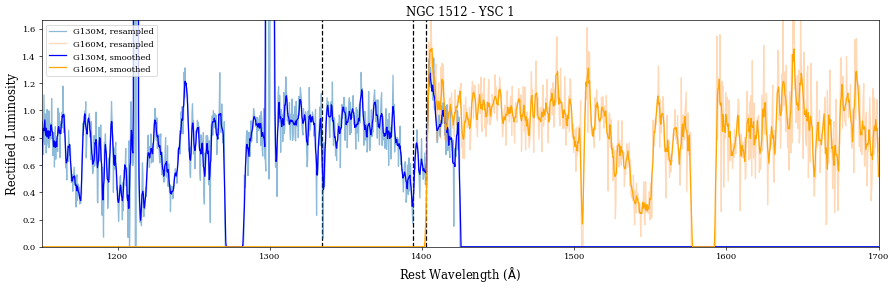

In [ ]:
# Load plotting packages and modules
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Set plot fontsize
size=14
wg='regular'
font = {'family' : 'serif',
        'weight' : wg,
        'size'   : size}
plt.rc('font', **font)

# Plot in this notebook
%matplotlib inline

# Plot result for YSC1
fig, axes = plt.subplots(figsize=(18,5), dpi=60)

# Set plot title
plt.title('NGC 1512 - YSC 1', fontsize=size)

# Set limits of horizontal axis
plt.xlim(1150.,1700.)

# Set label of horizontal axis
plt.xlabel(r'Rest Wavelength ($\rm{\AA}$)', fontsize=size)

# Set limits of vertical axis
good_x = np.where(x99 >= 1320) 
plt.ylim(min(y1_130[good_x]), 1.2*max(y1_130[good_x]))

# Set label of vertical axis
plt.ylabel('Rectified Luminosity', fontsize=size)

# Plot resampled, unsmoothed data
plt.plot(x99, y1_130, alpha=0.5, label='G130M, resampled')
plt.plot(x99, y1_160, alpha=0.3, label='G160M, resampled')

# Overlay resampled, smoothed data
plt.plot(x99, y1_130s, color='blue', alpha=1, label='G130M, smoothed')
plt.plot(x99, y1_160s, color='orange', alpha=1, label='G160M, smoothed')

# Mark positions of lines of interest
plt.axvline(x=1334.53,color='black',alpha=1,zorder=0, linestyle='--')
plt.axvline(x=1393.76,color='black',alpha=1,zorder=0, linestyle='--')
plt.axvline(x=1402.77,color='black',alpha=1,zorder=0, linestyle='--')

# Add legend
plt.legend()

### Plot the results for YSC #2.

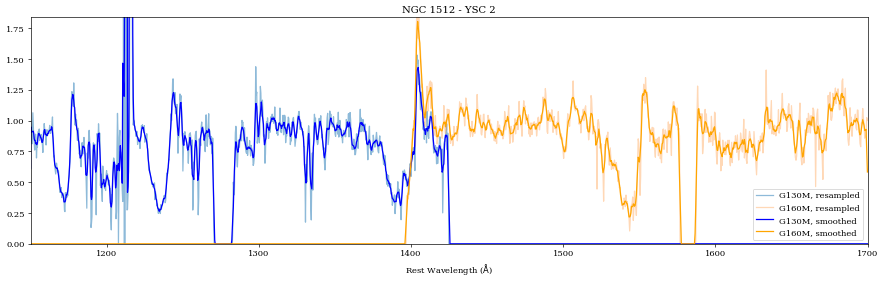

In [ ]:
# Load plotting packages and modules
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Plot in this notebook
%matplotlib inline

# Plot result for YSC1
fig, axes = plt.subplots(figsize=(18,5), dpi=60)

# Set plot title
plt.title('NGC 1512 - YSC 2')

# Set limits of horizontal axis
plt.xlim(1150.,1700.)

# Set label of horizontal axis
plt.xlabel(r'Rest Wavelength ($\rm{\AA}$)')

# Set limits of vertical axis
good_x = np.where(x99 >= 1320) 
plt.ylim(min(y2_130[good_x]), 1.2*max(y2_130[good_x]))

# Plot resampled, unsmoothed data
plt.plot(x99, y2_130, alpha=0.5, label='G130M, resampled')
plt.plot(x99, y2_160, alpha=0.3, label='G160M, resampled')

# Overlay resampled, smoothed data
plt.plot(x99, y2_130s, color='blue', alpha=1, label='G130M, smoothed')
plt.plot(x99, y2_160s, color='orange', alpha=1, label='G160M, smoothed')

# Add legend
plt.legend()

z= 0.005017

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 


Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 



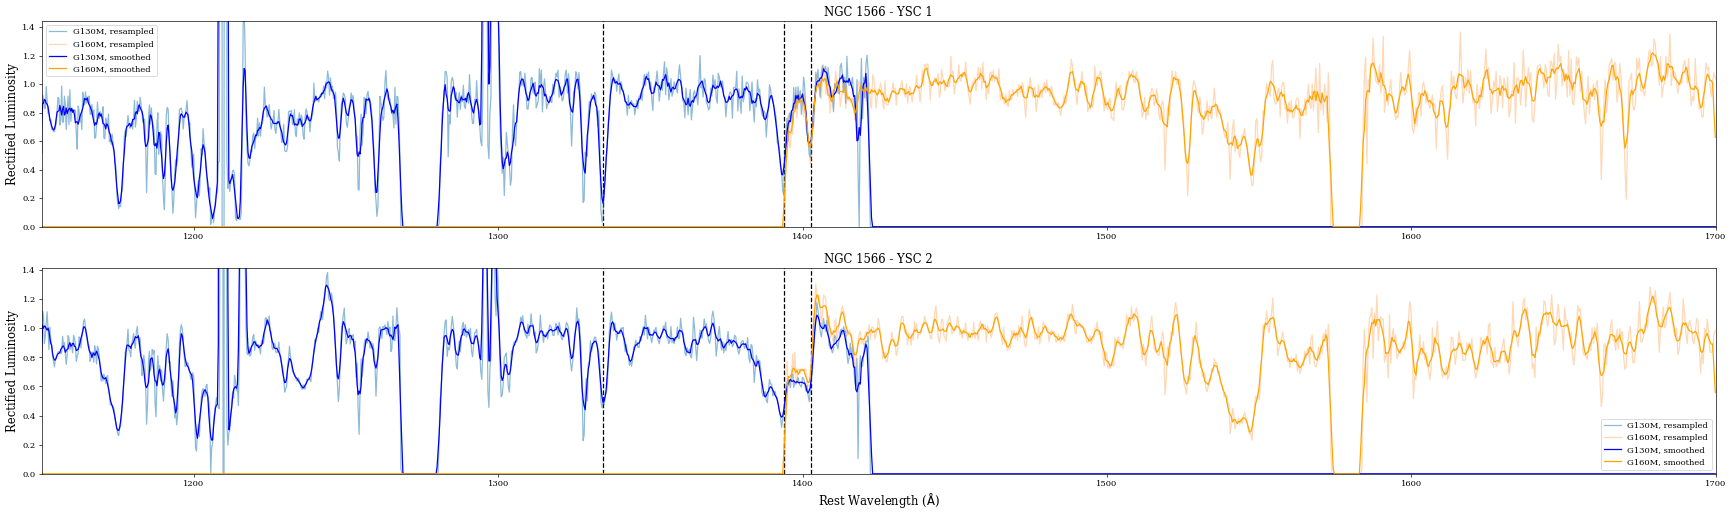

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.ned import Ned
from spectres import spectres
from matplotlib.pyplot import figure

path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

model='v94_z020_10Myr.ifaspec1'

t0 = .10000E+05

data=np.loadtxt(path+model, skiprows=6, delimiter="       ")
t, x, logy, yrec = np.transpose(data)

x99=x[np.nonzero((t == t0) & (x >= 1150.) & (x <= 1700.))]

result_table = Ned.query_object("NGC 1566")
z = result_table['Redshift'][0]
print('z=', z)

path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

grating=['NGC-1566-YSC1_G130M_normspec_wLya.dat','NGC-1566-YSC1_G160M_normspec_wLya.dat']
x130_1 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_1 = np.genfromtxt(path+grating[0], usecols=4)
x160_1 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_1 = np.genfromtxt(path+grating[1], usecols=4)

#path='https://raw.githubusercontent.com/aida-wofford/Carmen/main/'

grating=['NGC-1566-YSC2_G130M_normspec_wLya.dat','NGC-1566-YSC2_G160M_normspec_wLya.dat']
x130_2 = np.genfromtxt(path+grating[0], usecols=0) / (1 + z)
y130_2 = np.genfromtxt(path+grating[0], usecols=4)
x160_2 = np.genfromtxt(path+grating[1], usecols=0) / (1 + z)
y160_2 = np.genfromtxt(path+grating[1], usecols=4)


y1_130 = spectres(x99, x130_1, y130_1, fill=0.)
y2_130 = spectres(x99, x130_2, y130_2, fill=0.)
y1_160 = spectres(x99, x160_1, y160_1, fill=0.)
y2_160 = spectres(x99, x160_2, y160_2, fill=0.)

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

sf = 5

y1_130s = smooth(y1_130, sf)
y2_130s = smooth(y2_130, sf)
y1_160s = smooth(y1_160, sf)
y2_160s = smooth(y2_160, sf)

# Set plot fontsize
size=14
wg='regular'
font = {'family' : 'serif',
        'weight' : wg,
        'size'   : size}
plt.rc('font', **font)

%matplotlib inline

fig, axes = plt.subplots(2,figsize=(36,10), dpi=60)

axes[0].set_title('NGC 1566 - YSC 1', fontsize=size)
axes[1].set_title('NGC 1566 - YSC 2', fontsize=size)

axes[0].set_xlim(1150.,1700.)
axes[1].set_xlim(1150.,1700.)

axes[1].set_xlabel(r'Rest Wavelength ($\rm{\AA}$)', fontsize=size)

good_x = np.where(x99 >= 1320) 
axes[0].set_ylim(min(y1_130[good_x]), 1.2*max(y1_130[good_x]))
axes[1].set_ylim(min(y2_130[good_x]), 1.2*max(y2_130[good_x]))

# Set label of vertical axis
axes[0].set_ylabel('Rectified Luminosity', fontsize=size)
axes[1].set_ylabel('Rectified Luminosity', fontsize=size)

# Plot resampled, unsmoothed data
axes[0].plot(x99, y1_130, alpha=0.5, label='G130M, resampled')
axes[0].plot(x99, y1_160, alpha=0.3, label='G160M, resampled')
axes[1].plot(x99, y2_130, alpha=0.5, label='G130M, resampled')
axes[1].plot(x99, y2_160, alpha=0.3, label='G160M, resampled')

# Overlay resampled, smoothed data
axes[0].plot(x99, y1_130s, color='blue', alpha=1, label='G130M, smoothed')
axes[0].plot(x99, y1_160s, color='orange', alpha=1, label='G160M, smoothed')
axes[1].plot(x99, y2_130s, color='blue', alpha=1, label='G130M, smoothed')
axes[1].plot(x99, y2_160s, color='orange', alpha=1, label='G160M, smoothed')

# Mark positions of lines of interest
axes[0].axvline(x=1334.53,color='black',alpha=1,zorder=0, linestyle='--')
axes[0].axvline(x=1393.76,color='black',alpha=1,zorder=0, linestyle='--')
axes[0].axvline(x=1402.77,color='black',alpha=1,zorder=0, linestyle='--')
axes[1].axvline(x=1334.53,color='black',alpha=1,zorder=0, linestyle='--')
axes[1].axvline(x=1393.76,color='black',alpha=1,zorder=0, linestyle='--')
axes[1].axvline(x=1402.77,color='black',alpha=1,zorder=0, linestyle='--')

axes[0].legend()
axes[1].legend()